<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
with open('sat_scores.csv', 'rb') as f:
    sat_data = csv.reader(f, delimiter=',')
    
    sat_dict = {}
    header = []   # a list to hold the headers and use this list later to provide the key to the sat_dict
    
    for index, value in enumerate(sat_data):
        if index == 0:   # first row at index 0 contains all the headers
            header = value
            for cell in value:
                sat_dict[cell] = []   # assigns each header to a key and initialises an empty list to hold the values
        else:
            for cell_index, cell in enumerate(value):
                sat_dict[header[cell_index]].append(cell)
    print(sat_dict)
        
        

{'Math': ['510', '513', '515', '505', '516', '499', '499', '506', '500', '501', '499', '510', '499', '489', '501', '488', '474', '526', '499', '527', '499', '515', '510', '517', '525', '515', '542', '439', '539', '512', '542', '553', '542', '589', '550', '545', '572', '589', '580', '554', '568', '561', '577', '562', '596', '550', '570', '603', '582', '599', '551', '514'], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', 

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
# Creating a dataframe from the SAT dictionary

df_dict = pd.DataFrame(sat_dict)
df_dict.dtypes

Math      object
Rate      object
State     object
Verbal    object
dtype: object

In [4]:
# Creating a dataframe from reading CSV file
df_sat = pd.read_csv('sat_scores.csv')
df_sat.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [5]:
df_sat.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


In [ ]:
# Because the dictionary stored the values as string, hence the dataframe was created with all columns
# as string objects

# Versus pandas read_csv function was able to read that there are integer values and created the dataframe
# with integer type columns

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

<p style="color:#ff0000;">
Good Job!

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [8]:
df_sat.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [9]:
df_sat.tail()

,State,Rate,Verbal,Math
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551
51,All,45,506,514


In [10]:
# there is a row for average data of all states, this row should be removed in order not to mess up
# the statistics

df_sat = df_sat.iloc[0:51,:]
df_sat.tail()

,State,Rate,Verbal,Math
46,UT,5,575,570
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551


In [11]:
df_sat.shape

(51, 4)

<p style="color:#ff0000;">
Good Job!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [12]:
sats_data_dict = {'column_names':['State','Rate','Verbal','Math'],
                  'data_type':['string','integer','integer','integer'],
                  'description':['2 letter state code',
                                 'Participation rate of students for SAT test',
                                 'Average score of verbal section',
                                 'Average score of maths section'],
                  'shape':'52 rows by 4 columns'
                 }

<p style="color:#ff0000;">
Good Job!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

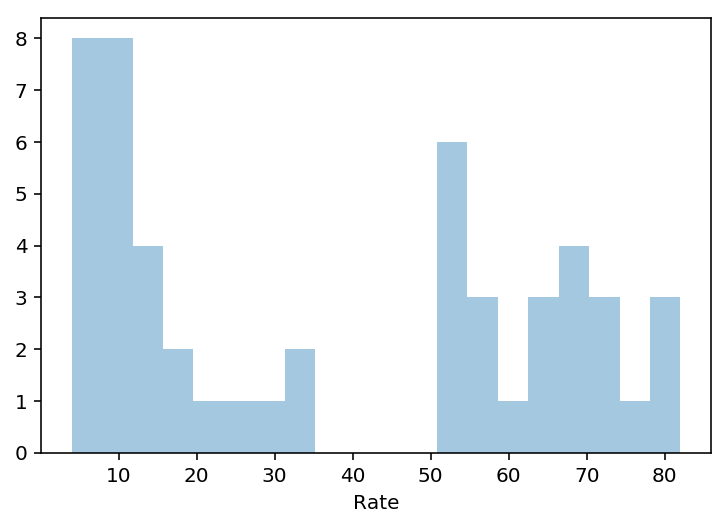

In [15]:
# Distribution of Rate
sns.distplot(df_sat['Rate'], kde=False, bins=20)

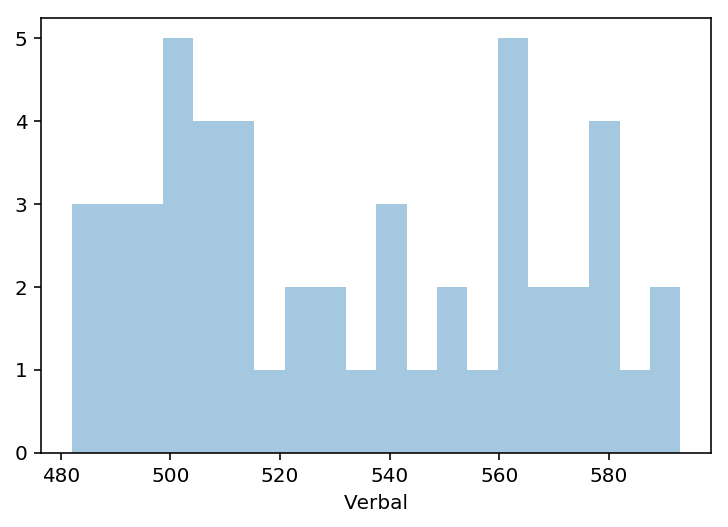

In [16]:
# Distribution of Verbal
sns.distplot(df_sat['Verbal'], kde=False, bins=20)

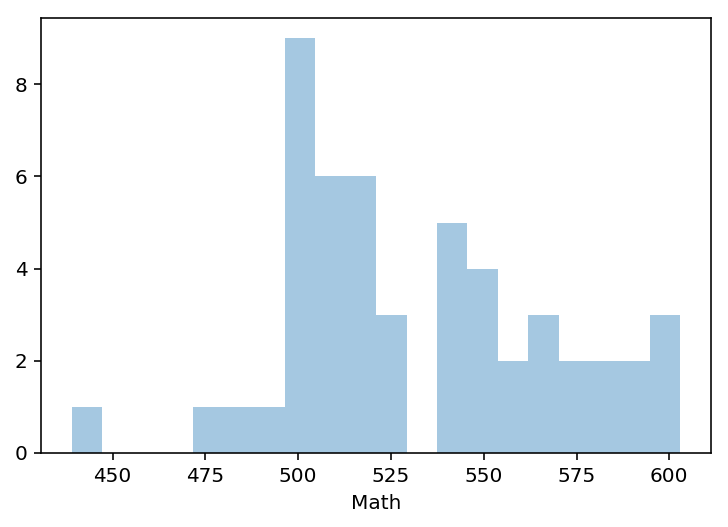

In [17]:
# Distribution of Math
sns.distplot(df_sat['Math'], kde=False, bins=20)

<p style="color:#ff0000;">
Good Job!

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

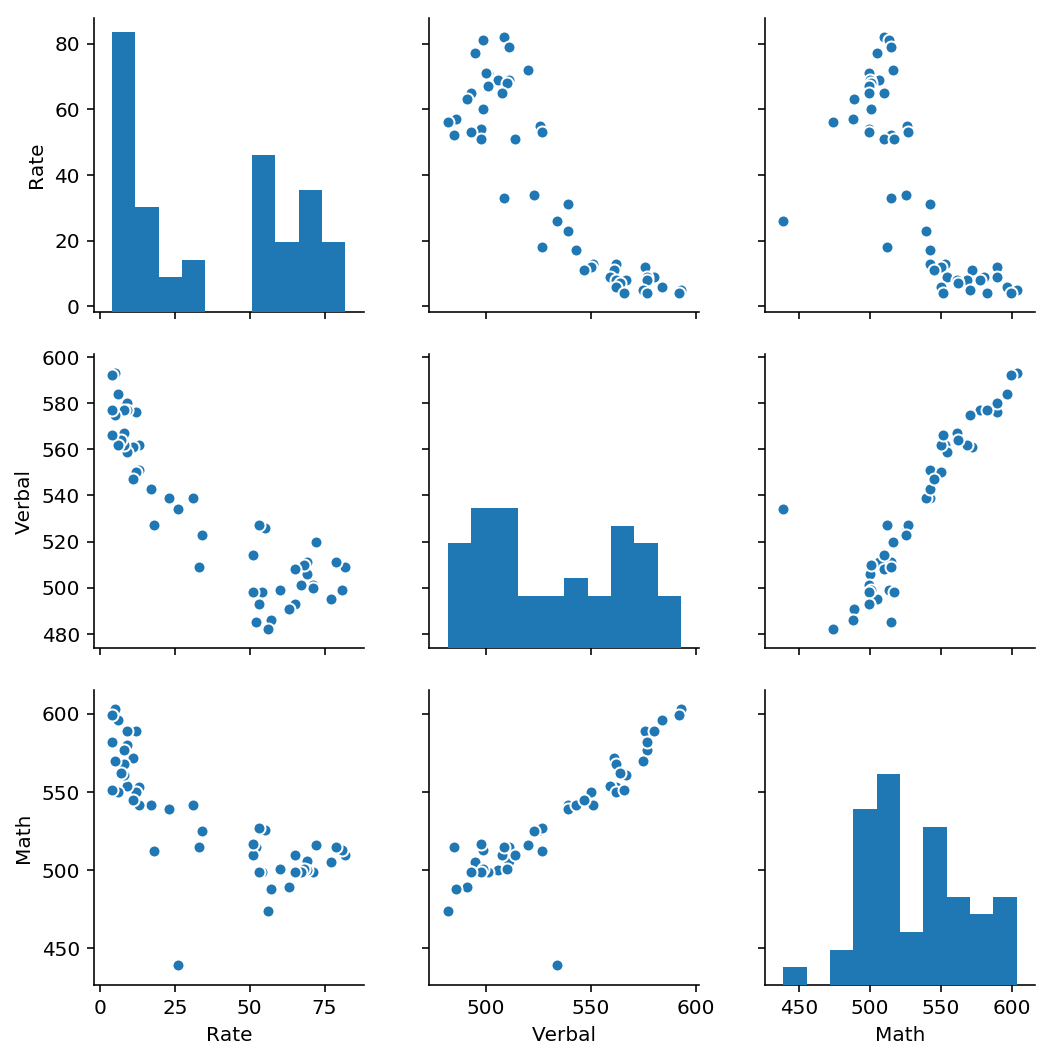

In [18]:
sns.pairplot(df_sat)

In [ ]:
# there appears to be a strong linear positive correlation between Math and Verbal scores
# there also seems to be a negative correlation between Rate and Math/Verbal scores, though it
# may not be linear

<p style="color:#ff0000;">
Good Job!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

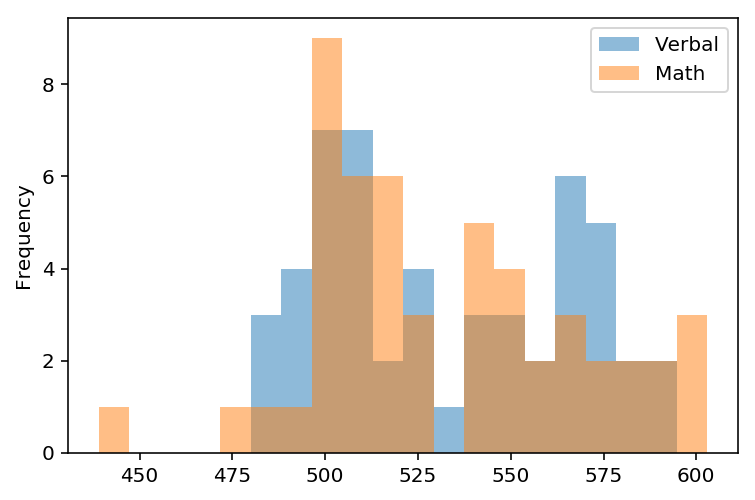

In [21]:
df_sat[['Verbal','Math']].plot.hist(alpha=0.5, bins=20)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

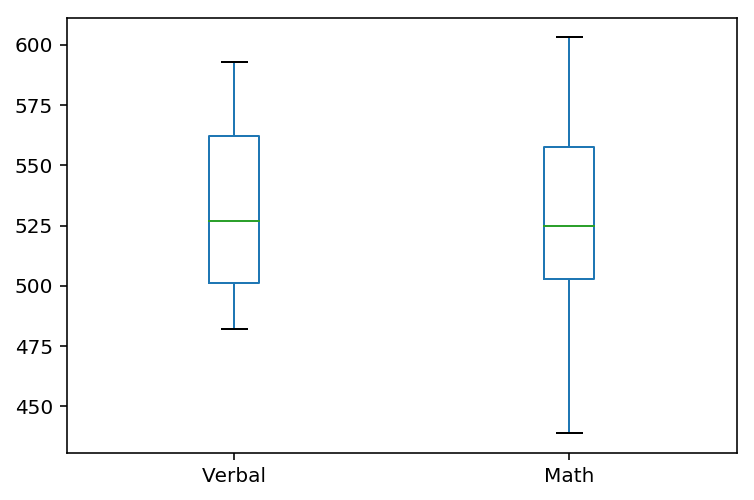

In [23]:
df_sat[['Verbal','Math']].plot.box()

In [25]:
# Boxplot shows more visually where the median, the lower and upper quartile are and also the spread of the data
# The values of Rate are lower (of a different scale) than those of Varbal and Math, hence if Rate is plotted together
# with Verbal and Math, the overall boxplot lose details

<p style="color:#ff0000;">
Good Job! It also shows you the outliers more than 1.5 IQR

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [26]:
# Scale each variable of Verbal, Math and Rate along their min-max range respectively, so that each
# observation is now between 0 to 1, hence all three variables can be plotted on the same chart to
# see their distribution

verbal_min = float(df_sat['Verbal'].min())
verbal_range = df_sat['Verbal'].max() - verbal_min
math_min = float(df_sat['Math'].min())
math_range = df_sat['Math'].max() - math_min
rate_min = float(df_sat['Rate'].min())
rate_range = df_sat['Rate'].max() - rate_min

df_scaled = df_sat.copy()   # if .copy() is not used, any changes in df_scaled will also affect df
for col in df_sat.columns:
    if col == 'Verbal':
        df_scaled[col].astype(float)
        for index, row in enumerate(df_scaled[col]):
            df_scaled.loc[index, col] = (df_sat.loc[index, col] - verbal_min)/verbal_range
    if col == 'Math':
        df_scaled[col].astype(float)
        for index, row in enumerate(df_scaled[col]):
            df_scaled.loc[index,col] = (df_sat.loc[index, col] - math_min)/math_range
    if col == 'Rate':
        df_scaled[col].astype(float)
        for index, row in enumerate(df_scaled[col]):
            df_scaled.loc[index,col] = (df_sat.loc[index, col] - rate_min)/rate_range

df_scaled.head()        

,State,Rate,Verbal,Math
0,CT,1.000000,0.243243,0.432927
1,NJ,0.987179,0.153153,0.451220
2,MA,0.961538,0.261261,0.463415
3,NY,0.935897,0.117117,0.402439
4,NH,0.871795,0.342342,0.469512


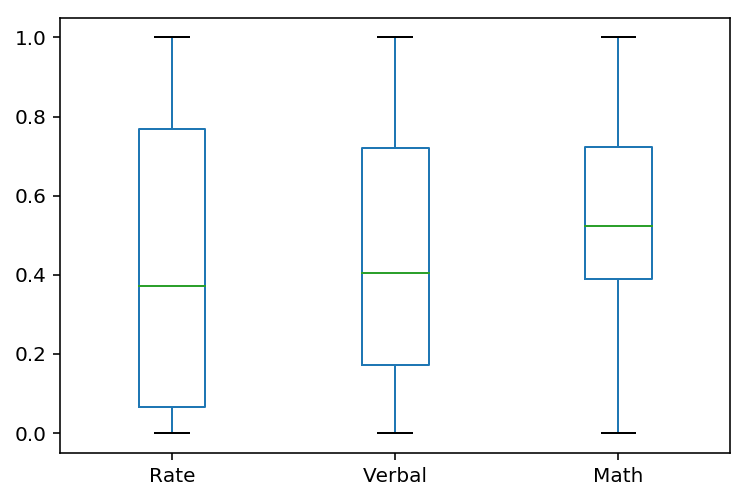

In [27]:
df_scaled.plot.box()

<p style="color:#ff0000;">
Good Job!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [28]:
high_verbal = df_sat[df_sat['Verbal'] > df_sat['Verbal'].mean()]
len(high_verbal)

24

In [ ]:
# Since there are more states below the average than above.  (27 states below vs 24 states above)
# this means the distribution is right skewed

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [29]:
upper_verbal = df_sat[df_sat['Verbal'] > df_sat['Verbal'].median()]
len(upper_verbal)

24

In [30]:
print('Mean of verbal: {}'.format(df_sat['Verbal'].mean()))
print('Median of verbal: {}'.format(df_sat['Verbal'].median()))

Mean of verbal: 532.529411765
Median of verbal: 527.0


In [33]:
df_sat[df_sat['Verbal']==df_sat['Verbal'].median()]

,State,Rate,Verbal,Math
19,WA,53,527,527
29,WV,18,527,512


In [ ]:
# The median being at the middle of the distribution should have 25 states above and below it.
# However, as there are only 24 states above the median, this means there are more than one state with the same
# median value

<p style="color:#ff0000;">
Good Job!

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [34]:
diff_verbal_math = df_sat['Verbal'] - df_sat['Math']
df_sat.insert(loc=4, column='VerbalMinusMath', value=diff_verbal_math)
df_sat.head()

,State,Rate,Verbal,Math,VerbalMinusMath
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


<p style="color:#ff0000;">
Good Job!

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [36]:
verbal_higher = df_sat.sort_values(by='VerbalMinusMath', axis=0, ascending=False).iloc[0:10, :]
verbal_higher.head(3)

,State,Rate,Verbal,Math,VerbalMinusMath
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


In [37]:
verbal_lower = df_sat.sort_values(by='VerbalMinusMath', axis=0, ascending=True).iloc[0:10, :]
verbal_lower.head(3)

,State,Rate,Verbal,Math,VerbalMinusMath
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


<p style="color:#ff0000;">
Good Job!

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [38]:
df_sat.corr()

,Rate,Verbal,Math,VerbalMinusMath
Rate,1.000000,-0.888121,-0.773419,-0.098671
Verbal,-0.888121,1.000000,0.899909,0.044527
Math,-0.773419,0.899909,1.000000,-0.395574
VerbalMinusMath,-0.098671,0.044527,-0.395574,1.000000


In [39]:
# There is a strong linear correlation between Verbal and Math score
# There is also a strong negative linear correlation between Rate and Verbal and between Rate and Math

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [40]:
df_sat.describe()

,Rate,Verbal,Math,VerbalMinusMath
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


In [ ]:
# count - the number of non-null data points
# mean - the average value of all data points
# std - the standard deviation of the distribution of the data points, 
#       indicates the spread of the data points from the mean
# min - the lowest value of the data points for each of the columns
# 25% - the data value that lies on the 25% percentile of the distribution of the data points
# 50% - the data value that lies on the midway of the distribution of the data points, also known as the median
# 75% - the data value that lies on the 75% percentile of the distribution of the data points
# max - the highest value of the data points

In [ ]:
# Insights on the summary statistics for Rate
# The mean and median of Rate are 37 and 33 respectively.  This seems to be pretty low participation rate for the SAT test
# However, the standard deviation is pretty high at 27.6, almost the same magnitude as the mean.
# This indicates a wide distribution of the values for Rate, which is confirmed by the wide range between min and max values

In [ ]:
# Insights on Verbal and Math
# The statistics for Verbal and Math are quite similar, with similar values for both features
#
# The mean value of VerbalMinusMath indicate a marginally higher Verbal average score than Math since it is positive,
# but the value is close to zero and the standard deviation of VerbalMinusMath is much bigger than the mean value,
# which means a very wide spread/distribution of the values

<p style="color:#ff0000;">
Good Job!

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [41]:
df_sat.cov()

,Rate,Verbal,Math,VerbalMinusMath
Rate,759.04,-816.280000,-773.220000,-43.060000
Verbal,-816.28,1112.934118,1089.404706,23.529412
Math,-773.22,1089.404706,1316.774902,-227.370196
VerbalMinusMath,-43.06,23.529412,-227.370196,250.899608


In [ ]:
# Covariance is the sum of deviations from the mean of first variable multiplied by deviations from mean of second variable
# divided by sample size
# Covariance can be converted to correlation by dividing covariance by standard deviation of first variable and standard
# deviation of second variable
# Covariance is difficult to read and interprete because it is relative to the variance of the variables.
# Correlation is preferred because it is dimensonless and between the values of -1 to 1, which is easy to interprete
# value of -1 is a perfect negative correlation vs value of 1 is a perfect positive correlation.
# value of 0 means no correlation at all.

<p style="color:#ff0000;">
Good Job!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [42]:
drugs = pd.read_csv('drug-use-by-age.csv')

In [74]:
drugs.head(10)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [44]:
drugs.tail()

# in the age column, there are age groups indicated by text, eg. 26-29
# column 'n' most likely indicate the number of people in each age group

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0
14,35-49,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,...,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
16,65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,...,0.0,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0


In [45]:
drugs.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,crack-use,heroin-use,hallucinogen-use,hallucinogen-frequency,...,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,0.294118,0.352941,3.394118,8.411765,...,6.270588,14.705882,0.935294,2.805882,11.735294,1.917647,31.147059,0.382353,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,0.235772,0.333762,2.792506,15.000245,...,3.166379,6.935098,0.608216,1.753379,11.485205,1.407673,85.973790,0.262762,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.100000,2.000000,...,0.600000,7.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,0.000000,0.100000,0.600000,3.000000,...,3.900000,12.000000,0.400000,1.400000,6.000000,0.600000,7.000000,0.200000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,0.400000,0.200000,3.200000,3.000000,...,6.200000,12.000000,1.100000,3.500000,10.000000,1.800000,10.000000,0.400000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,0.500000,0.600000,5.200000,4.000000,...,9.000000,15.000000,1.400000,4.200000,11.000000,3.000000,12.000000,0.600000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,0.600000,1.100000,8.600000,52.000000,...,10.000000,36.000000,1.700000,5.400000,52.000000,4.100000,364.000000,0.900000,0.500000,104.000000


In [46]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [ ]:
# from the info function, the following fields should be numeric but are not, and hence requires cleaning
# cocaine-frequency, crack-frequency, heroin-frequency, inhalant-frequency, oxycontin-frequency, meth-frequency

In [47]:
drugs['cocaine-frequency'].value_counts()

5.0     6
5.5     2
8.0     2
15.0    1
-       1
7.0     1
6.0     1
4.0     1
1.0     1
36.0    1
Name: cocaine-frequency, dtype: int64

In [48]:
drugs['crack-frequency'].value_counts()

-       3
6.0     2
5.0     2
15.0    1
2.0     1
9.5     1
3.0     1
17.0    1
48.0    1
62.0    1
21.0    1
1.0     1
10.0    1
Name: crack-frequency, dtype: int64

In [49]:
drugs['heroin-frequency'].value_counts()

120.0    1
-        1
180.0    1
66.0     1
1.0      1
66.5     1
50.0     1
30.0     1
88.0     1
46.0     1
35.5     1
64.0     1
57.5     1
280.0    1
2.0      1
45.0     1
41.0     1
Name: heroin-frequency, dtype: int64

In [50]:
drugs['inhalant-frequency'].value_counts()

4.0     5
2.0     2
3.0     2
3.5     1
13.5    1
-       1
19.0    1
12.0    1
5.5     1
10.0    1
5.0     1
Name: inhalant-frequency, dtype: int64

In [51]:
drugs['oxycontin-frequency'].value_counts()

13.5    2
12.0    2
17.5    1
3.0     1
20.0    1
7.0     1
41.0    1
6.0     1
-       1
5.0     1
24.5    1
7.5     1
4.0     1
46.0    1
4.5     1
Name: oxycontin-frequency, dtype: int64

In [52]:
drugs['meth-frequency'].value_counts()

12.0     2
-        2
30.0     2
104.0    1
36.0     1
2.0      1
24.0     1
46.0     1
48.0     1
54.0     1
105.0    1
21.0     1
10.5     1
5.0      1
Name: meth-frequency, dtype: int64

In [53]:
# To replace the '-' character with the numeric zero and convert to float the affected columns

to_clean = ['cocaine-frequency', 'crack-frequency', 'heroin-frequency', 'inhalant-frequency',
            'oxycontin-frequency', 'meth-frequency']

for label in to_clean:
    drugs.loc[drugs[label]=='-', label] = 0.
    drugs[label] = pd.to_numeric(drugs[label], downcast='float')

In [54]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null float32
crack-use                  17 non-null float64
crack-frequency            17 non-null float32
heroin-use                 17 non-null float64
heroin-frequency           17 non-null float32
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null float32
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

<p style="color:#ff0000;">
Good Job!

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [55]:
# Split the original drugs table into 2 sub-tables:
# 1. drugs_users - lists the percentage of drug users per age group
# 2. drugs_usage - lists the median number of times a drug user used each drug in the past 12 months

drugs_users_percent = drugs.copy()
drugs_usage = drugs.copy()

for header in drugs_users_percent.columns:
    if 'frequency' in header:
        drugs_users_percent = drugs_users_percent.drop(columns=header)
    elif 'use' in header:
        drugs_usage = drugs_usage.drop(columns=header)

In [56]:
# Multiply the pecentages in drugs_users by the column 'n' which is assumed to be the size of the age group
# to get the absolute number of drug users instead of only percentages.
drugs_users = drugs_users_percent.copy()

for col in drugs_users.columns:
    if 'use' in col:
        # round the number of drug users to the nearest whole number
        drugs_users[col] = np.round((drugs_users[col]/100. * drugs_users['n']), decimals=0)

In [57]:
drugs_users = drugs_users.drop(columns='n')

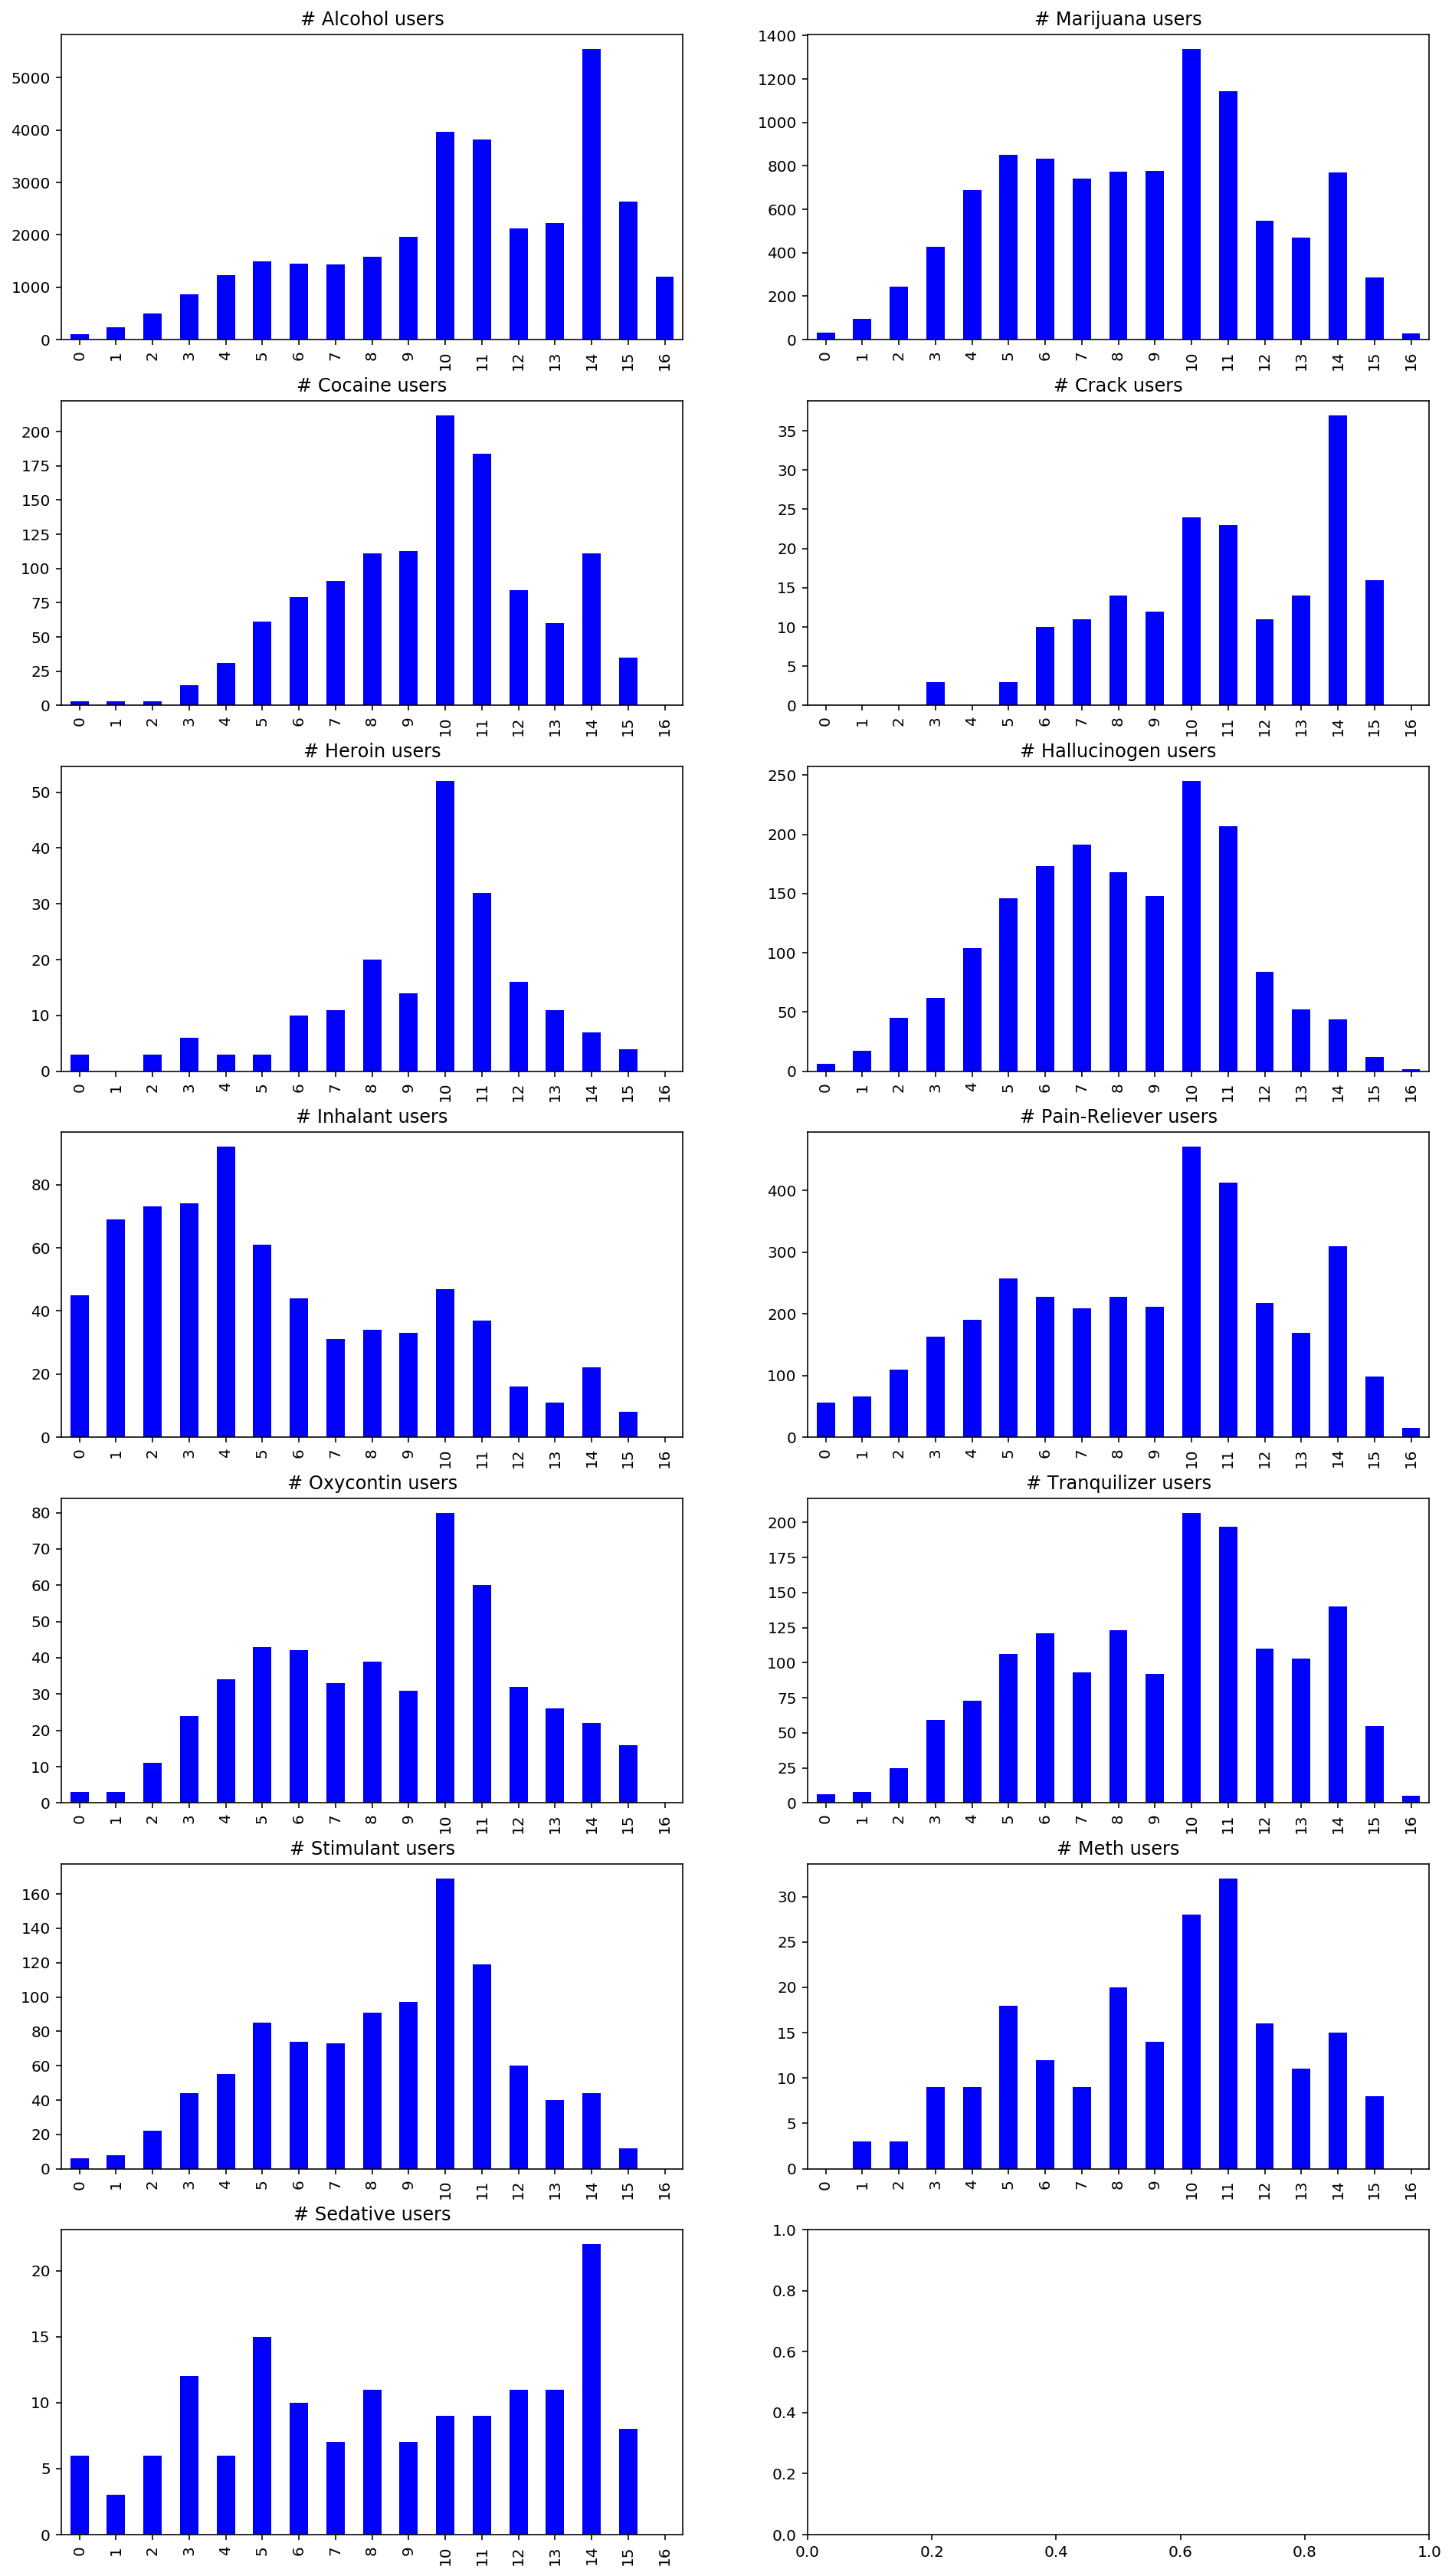

In [68]:
# Plot the number of drug users of each age group to compare across the age groups

fig, axes = plt.subplots(7,2, figsize=(16,30))
drugs_users['alcohol-use'].plot(kind='bar', color='b', ax=axes[0][0], title='# Alcohol users')
drugs_users['marijuana-use'].plot(kind='bar', color='b', ax=axes[0][1], title='# Marijuana users')
drugs_users['cocaine-use'].plot(kind='bar', color='b', ax=axes[1][0], title='# Cocaine users')
drugs_users['crack-use'].plot(kind='bar', color='b', ax=axes[1][1], title='# Crack users')
drugs_users['heroin-use'].plot(kind='bar', color='b', ax=axes[2][0], title='# Heroin users')
drugs_users['hallucinogen-use'].plot(kind='bar', color='b', ax=axes[2][1], title='# Hallucinogen users')
drugs_users['inhalant-use'].plot(kind='bar', color='b', ax=axes[3][0], title='# Inhalant users')
drugs_users['pain-releiver-use'].plot(kind='bar', color='b', ax=axes[3][1], title='# Pain-Reliever users')
drugs_users['oxycontin-use'].plot(kind='bar', color='b', ax=axes[4][0], title='# Oxycontin users')
drugs_users['tranquilizer-use'].plot(kind='bar', color='b', ax=axes[4][1], title='# Tranquilizer users')
drugs_users['stimulant-use'].plot(kind='bar', color='b', ax=axes[5][0], title='# Stimulant users')
drugs_users['meth-use'].plot(kind='bar', color='b', ax=axes[5][1], title='# Meth users')
drugs_users['sedative-use'].plot(kind='bar', color='b', ax=axes[6][0], title='# Sedative users')

# charts indicate that age-groups '22-23' and '24-25' have the highest numbers of drug users in 9 of 13 categories
# charts indicate that age-groups '35-49' has the highest numbers of drug users in 3 of the 13 categories
# these 3 age groups seem to lead in almost all the categories in terms of numbers of drug users.

# It seems odd that there is a drop in the number of drug users in age groups 26-34 from 22-25 and then rises
# again in age group 35-49.  Is it an abnormaly or an error in the date gathering?
# Might be interesting to look into the reasons why the number of drug users in age groups 26 to 34 is lower 
# than the adjacent age groups

# With the exception of inhalant, the older age groups have more drug users than the younger ones

In [69]:
drugs_users_corr = drugs_users.corr()
drugs_users_corr

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
alcohol-use,1.000000,0.637058,0.745952,0.955363,0.558429,0.331000,-0.413557,0.738412,0.529195,0.769957,0.491582,0.681294,0.627267
marijuana-use,0.637058,1.000000,0.911635,0.624419,0.780250,0.913216,0.068414,0.960088,0.958426,0.948544,0.951200,0.910818,0.470591
cocaine-use,0.745952,0.911635,1.000000,0.771690,0.903873,0.825143,-0.209522,0.935381,0.882303,0.949139,0.911020,0.922859,0.381169
crack-use,0.955363,0.624419,0.771690,1.000000,0.578998,0.367069,-0.454997,0.716965,0.507558,0.771816,0.493847,0.667286,0.652556
heroin-use,0.558429,0.780250,0.903873,0.578998,1.000000,0.756483,-0.112796,0.838796,0.861244,0.831272,0.874371,0.831049,0.144845
hallucinogen-use,0.331000,0.913216,0.825143,0.367069,0.756483,1.000000,0.126353,0.817990,0.913825,0.807031,0.943395,0.795181,0.186449
inhalant-use,-0.413557,0.068414,-0.209522,-0.454997,-0.112796,0.126353,1.000000,0.040221,0.095505,-0.134988,0.084829,-0.066874,-0.068967
pain-releiver-use,0.738412,0.960088,0.935381,0.716965,0.838796,0.817990,0.040221,1.000000,0.931239,0.969558,0.912800,0.938857,0.532976
oxycontin-use,0.529195,0.958426,0.882303,0.507558,0.861244,0.913825,0.095505,0.931239,1.000000,0.921777,0.963977,0.910130,0.338472
tranquilizer-use,0.769957,0.948544,0.949139,0.771816,0.831272,0.807031,-0.134988,0.969558,0.921777,1.000000,0.886448,0.952736,0.551882


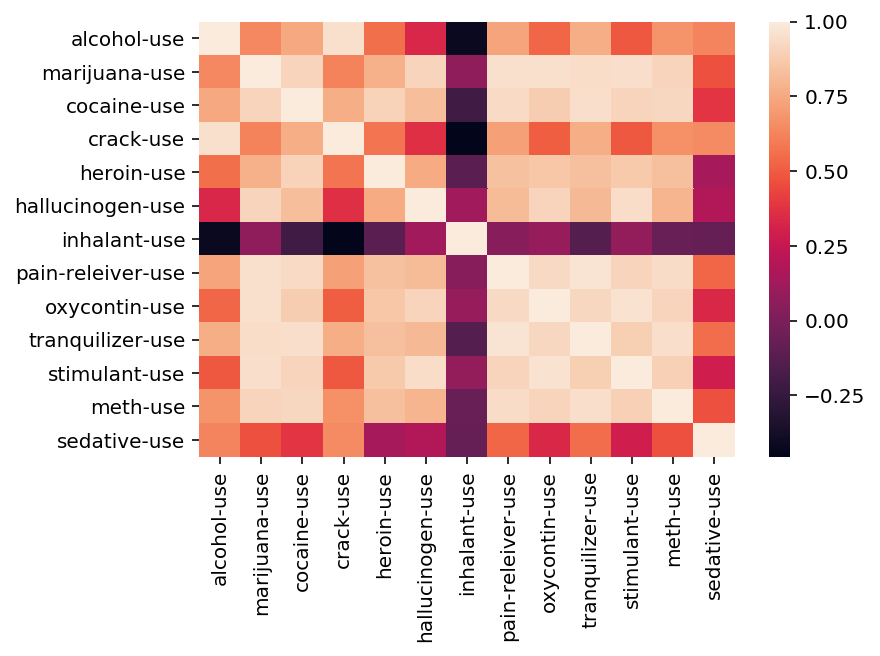

In [70]:
sns.heatmap(drugs_users_corr)

# the heatmap indicates a strong correlation in the number of drug users by age group among the following drugs:
# 1. pain-reliever
# 2. oxycontin
# 3. tranquilizer
# 4. stimulant
# 5. meth
# 6. marijuana
# 7. cocaine

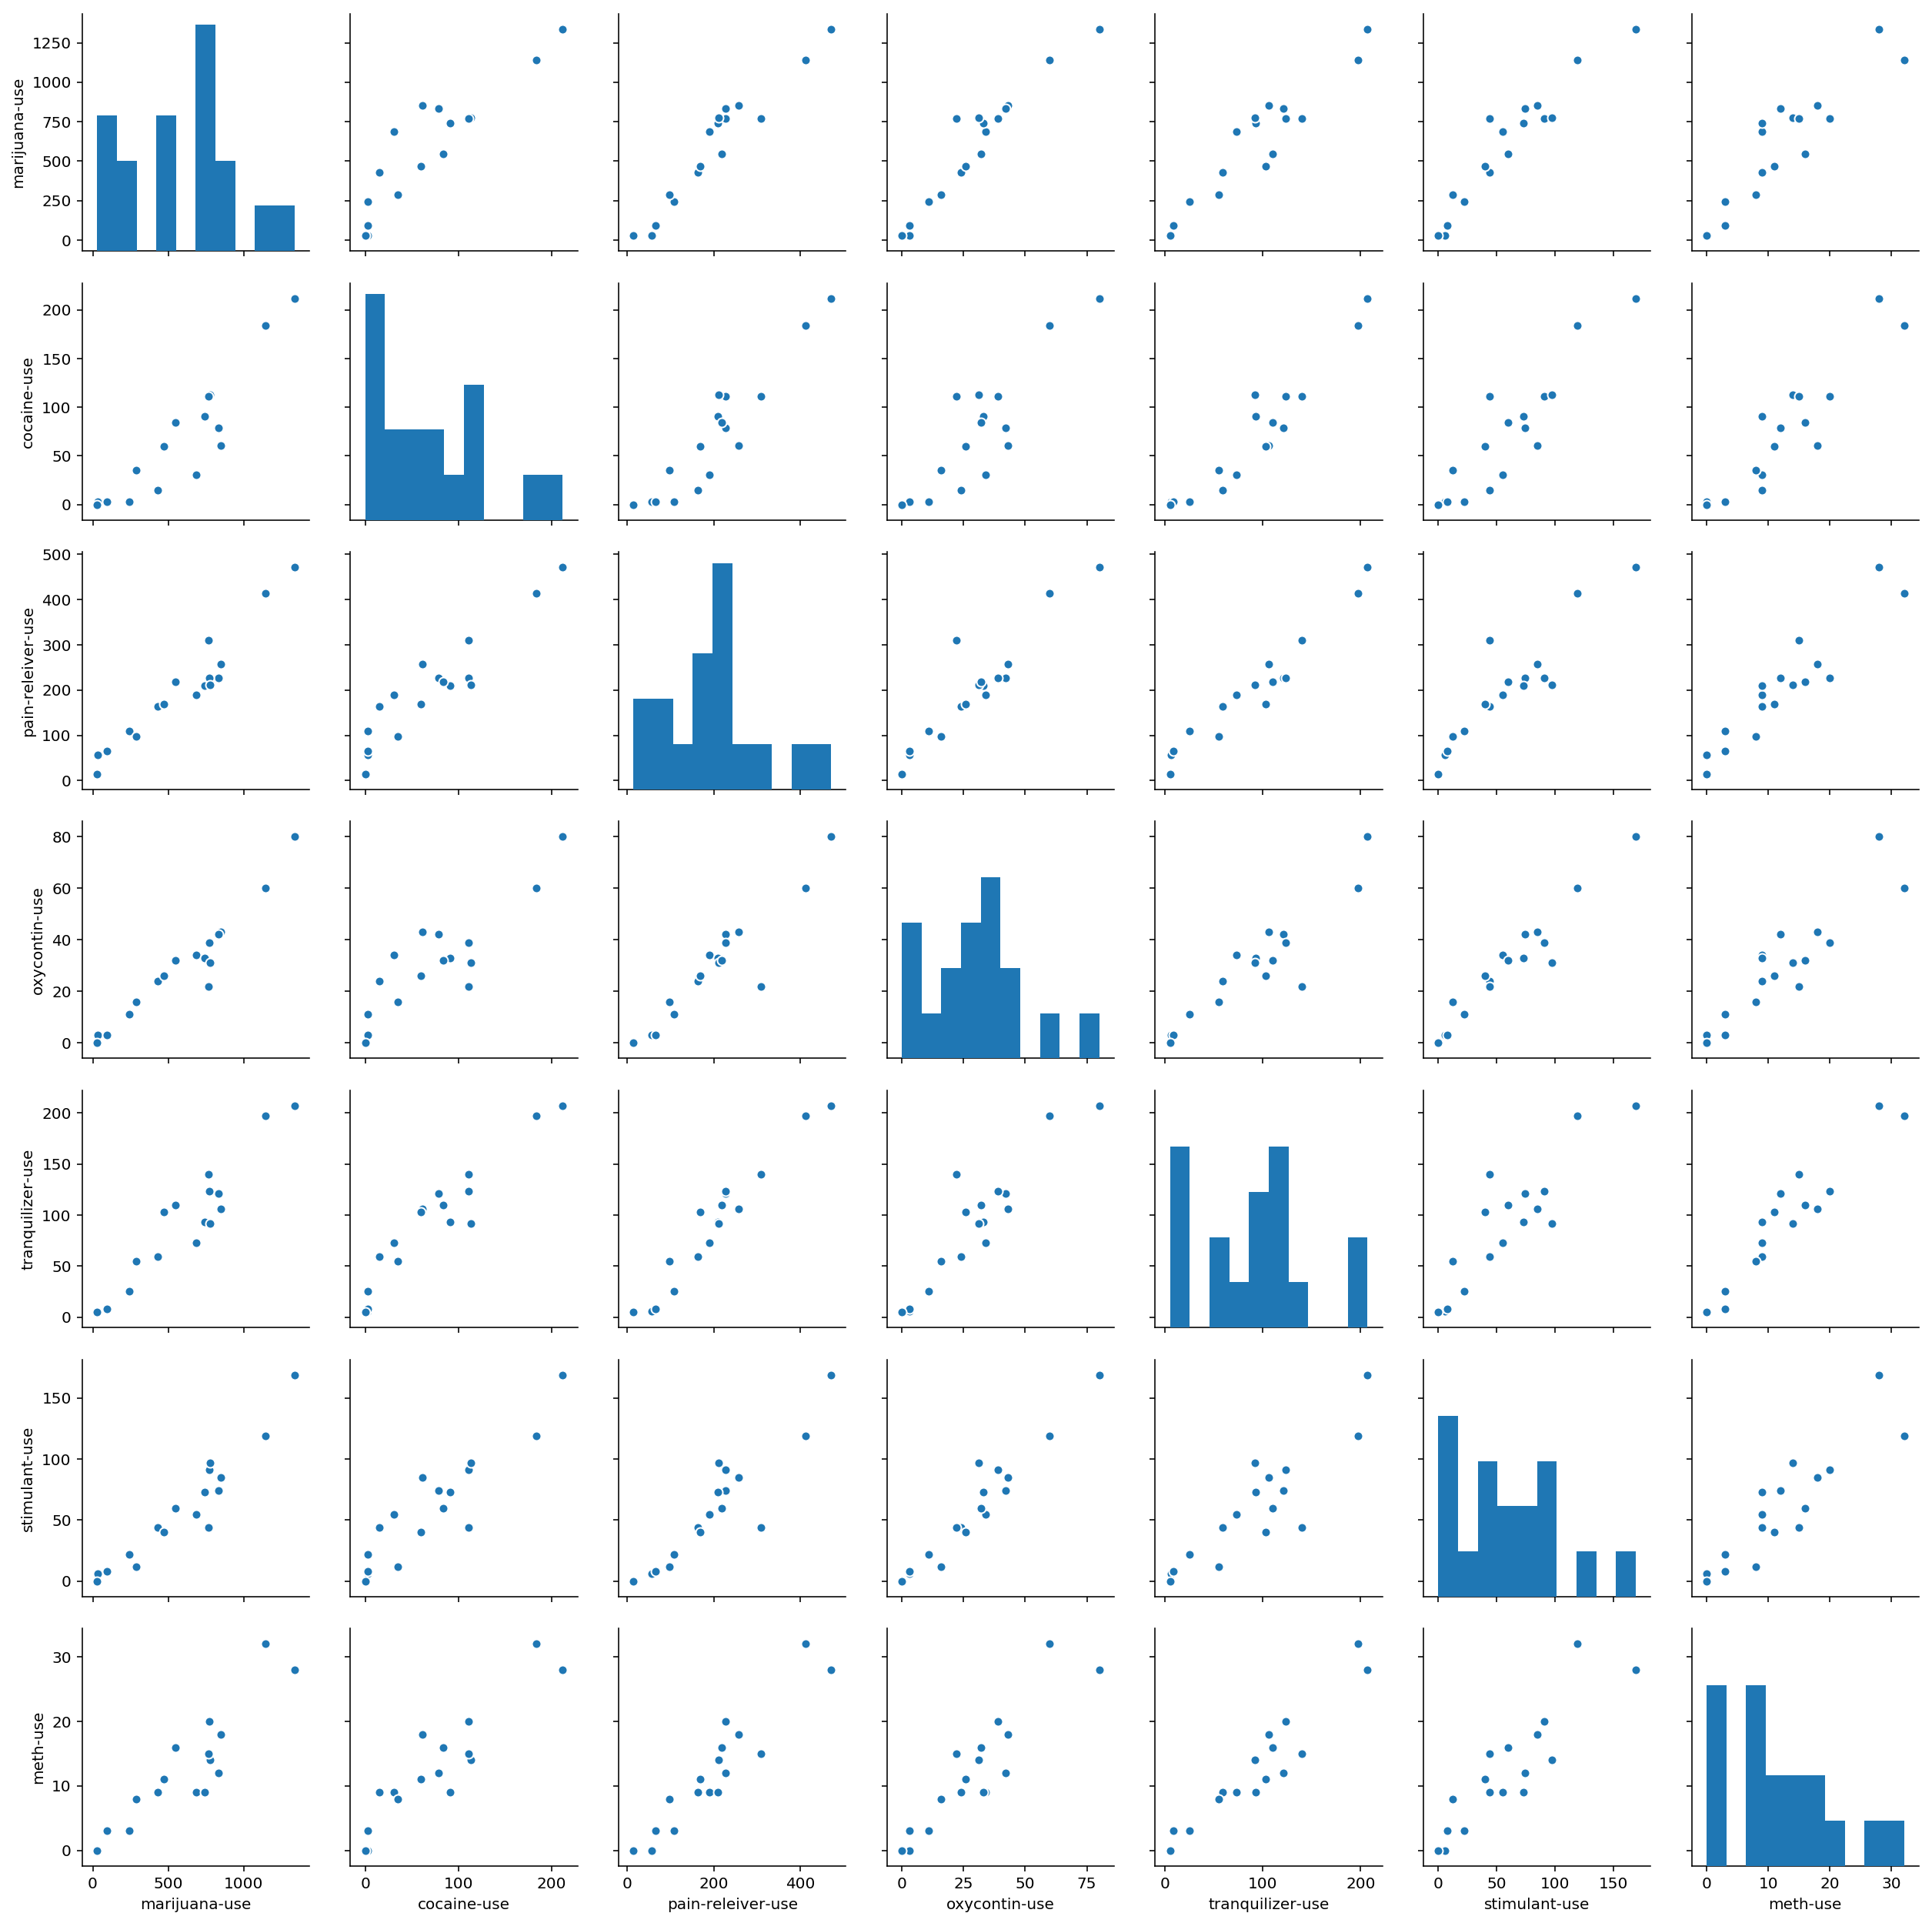

In [71]:
# Use pairplot to visually confirm the correlation between the 7 drug categories

sns.pairplot(drugs_users[['marijuana-use', 'cocaine-use', 'pain-releiver-use', 'oxycontin-use', 'tranquilizer-use',\
                          'stimulant-use', 'meth-use']])

In [72]:
# Repeat the same EDA on the other table, drugs_usage to see if there are any trends in the usage frequency

columns = ['age','n','alcohol','marijuana','cocaine','crack','heroin','hallucinogen','inhalant','pain-reliever',\
          'oxycontin','tranquilizer','stimulant','meth','sedative']
drugs_usage.columns = columns
drugs_usage = drugs_usage.drop(columns='n')

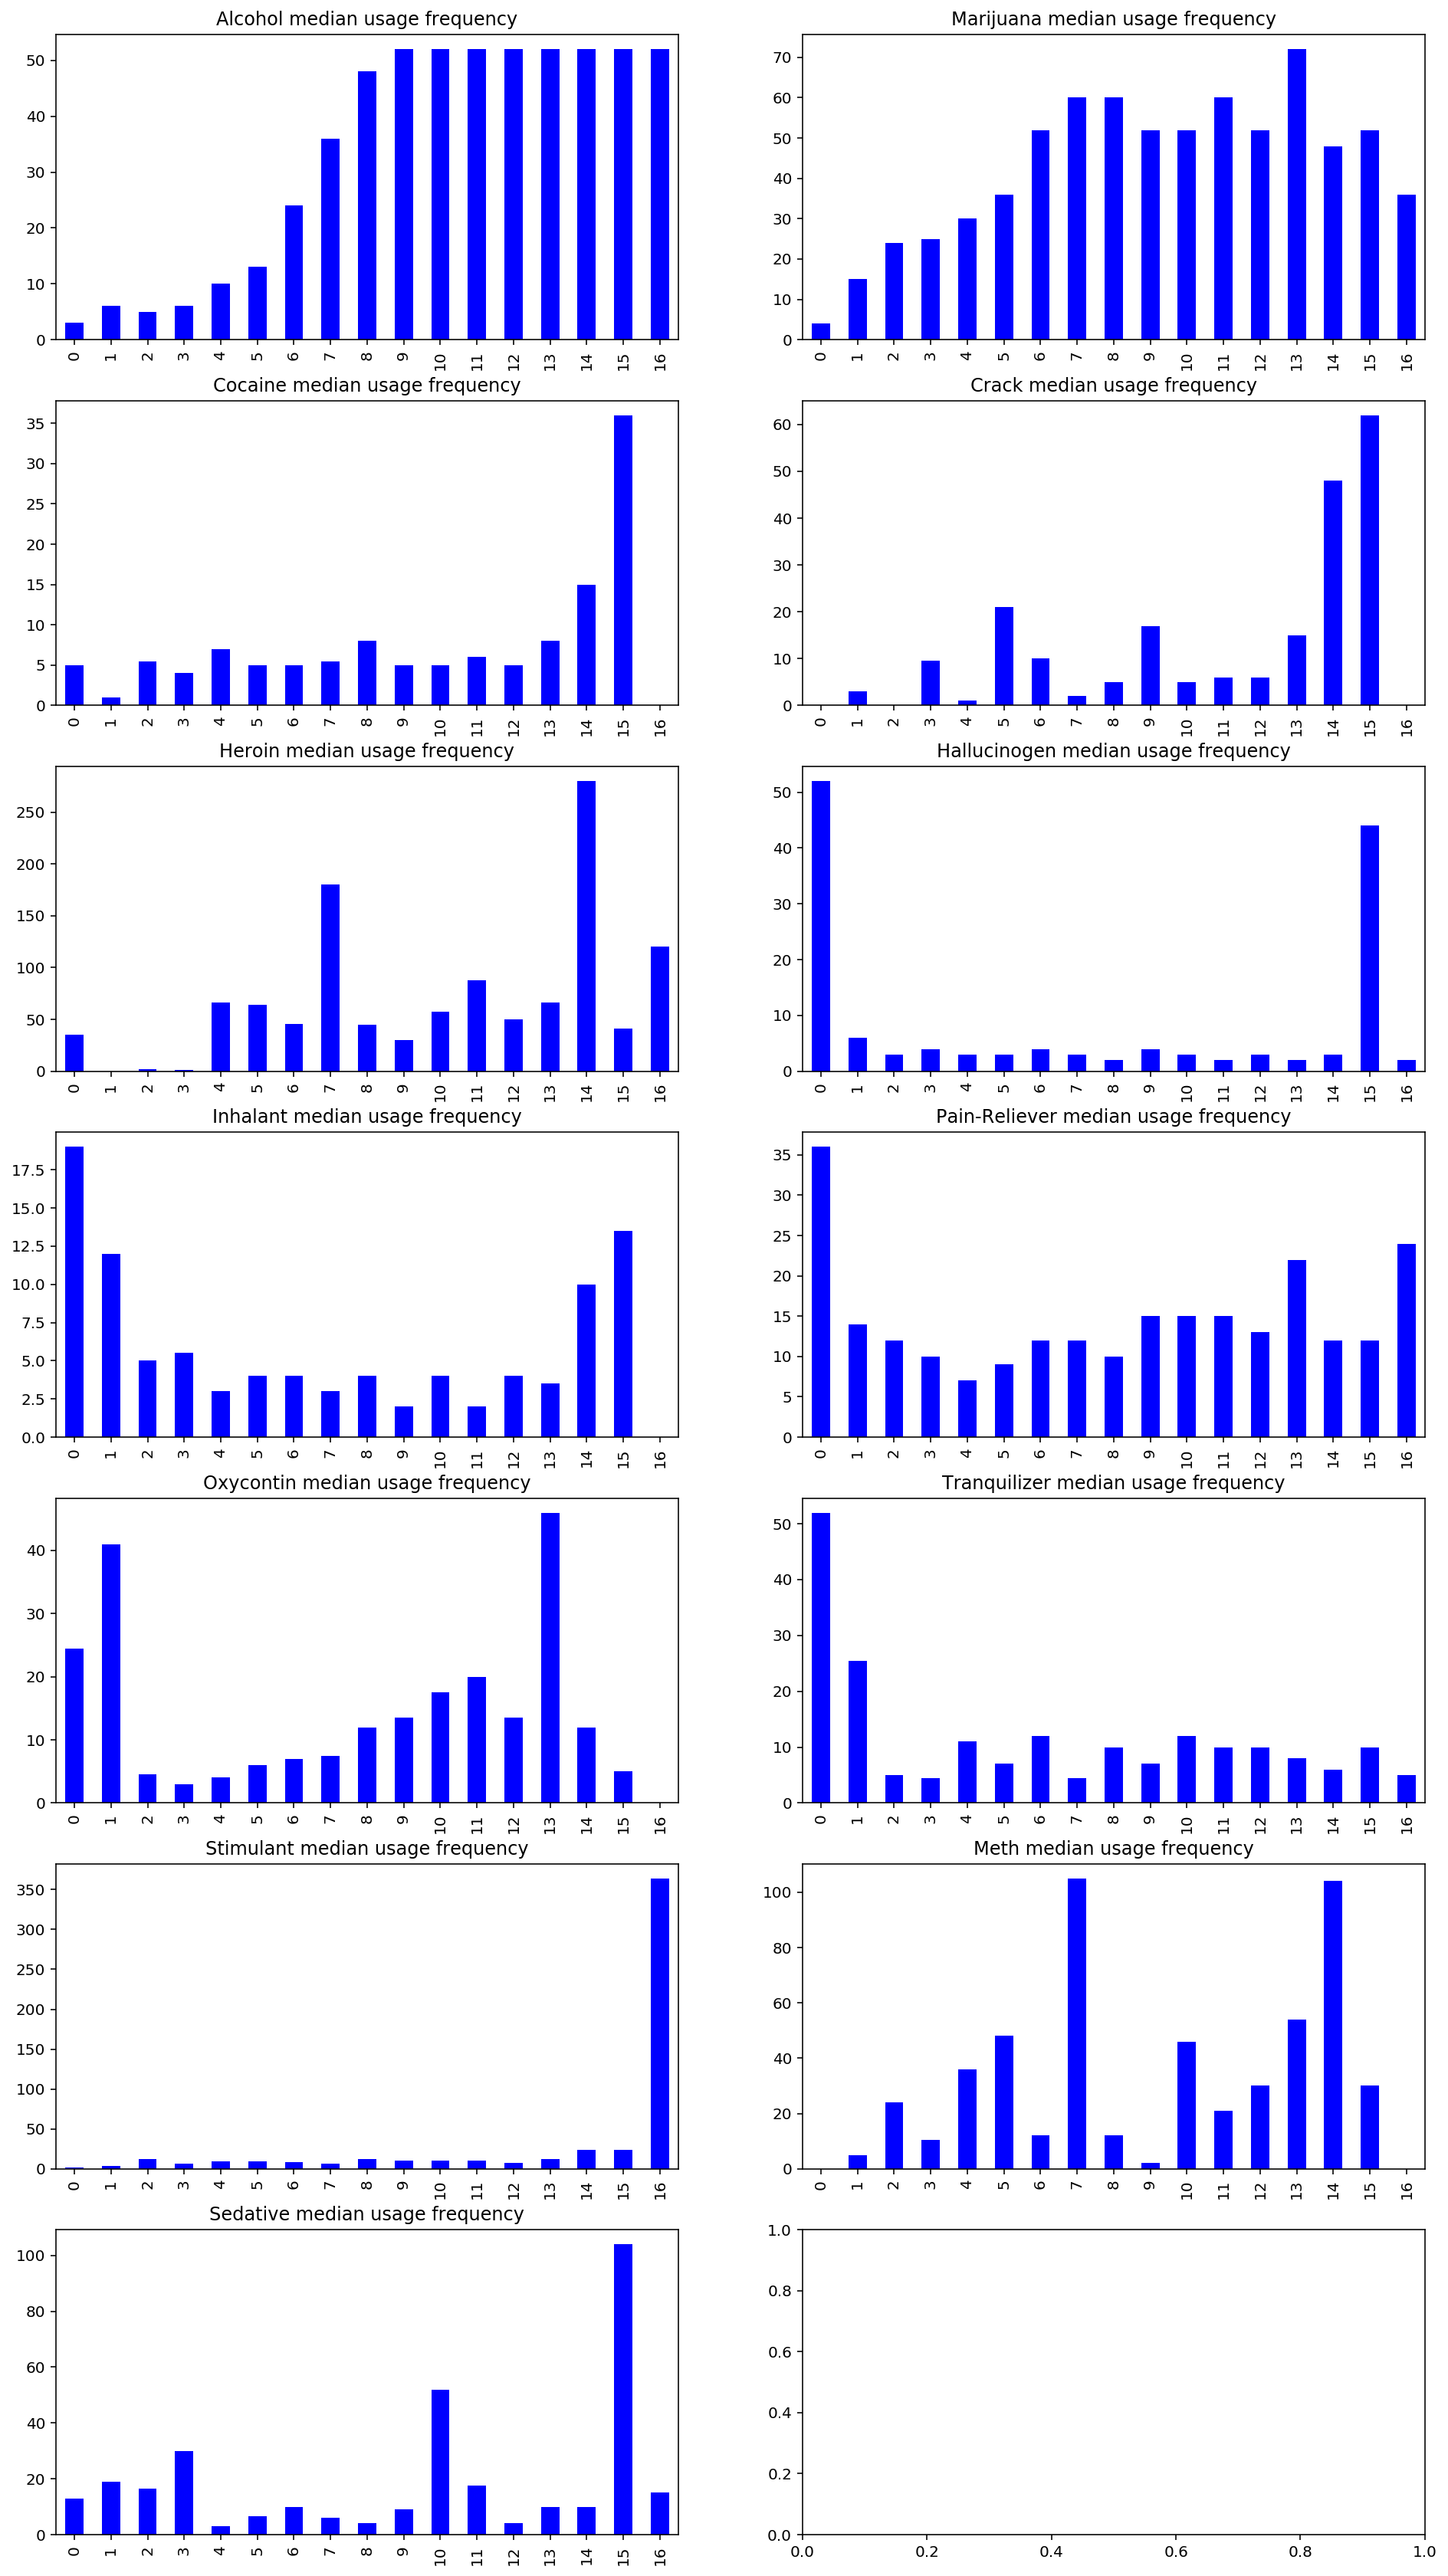

In [76]:
fig, axes = plt.subplots(7,2, figsize=(16,30))
drugs_usage['alcohol'].plot(kind='bar', color='b', ax=axes[0][0], title='Alcohol median usage frequency')
drugs_usage['marijuana'].plot(kind='bar', color='b', ax=axes[0][1], title='Marijuana median usage frequency')
drugs_usage['cocaine'].plot(kind='bar', color='b', ax=axes[1][0], title='Cocaine median usage frequency')
drugs_usage['crack'].plot(kind='bar', color='b', ax=axes[1][1], title='Crack median usage frequency')
drugs_usage['heroin'].plot(kind='bar', color='b', ax=axes[2][0], title='Heroin median usage frequency')
drugs_usage['hallucinogen'].plot(kind='bar', color='b', ax=axes[2][1], title='Hallucinogen median usage frequency')
drugs_usage['inhalant'].plot(kind='bar', color='b', ax=axes[3][0], title='Inhalant median usage frequency')
drugs_usage['pain-reliever'].plot(kind='bar', color='b', ax=axes[3][1], title='Pain-Reliever median usage frequency')
drugs_usage['oxycontin'].plot(kind='bar', color='b', ax=axes[4][0], title='Oxycontin median usage frequency')
drugs_usage['tranquilizer'].plot(kind='bar', color='b', ax=axes[4][1], title='Tranquilizer median usage frequency')
drugs_usage['stimulant'].plot(kind='bar', color='b', ax=axes[5][0], title='Stimulant median usage frequency')
drugs_usage['meth'].plot(kind='bar', color='b', ax=axes[5][1], title='Meth median usage frequency')
drugs_usage['sedative'].plot(kind='bar', color='b', ax=axes[6][0], title='Sedative median usage frequency')

# Alcohol usage increases with age and appears to max out of the measurement scale at age group 21 onwards
# Cocaine usage is very high at the 50-64 age group
# Hallucinogen usage is unusally high in age group 12 and 50-64.  Especially at age 12, it seems strange to have
# such a high usage compared to age 13 or 14 onwards until the sudden peak at 50-64 again.
# Likewise it seems strange that drug usage at age 12 is again higher than at 13, 14 and 15.  Age group 19 also
# stands out as a particularly high usage versus adjacent age groups
# Oxycontin and tranquilizer usage also seems unusally high at age 12 and 13. Are children being prescribed
# these drugs unnecessarily?  Pain-reliever is also very high at age 12
# Stimulant drugs are exceedingly high in the oldest age group
# Meth usage stands out in age 19 and 35-49 groups vs other age groups.
# Sedative usage stands out in age 22-23 and 50-64 being higher than other age groups

In [75]:
drugs_usage_corr = drugs_usage.corr()
drugs_usage_corr

,alcohol,marijuana,cocaine,crack,heroin,hallucinogen,inhalant,pain-reliever,oxycontin,tranquilizer,stimulant,meth,sedative
alcohol,1.000000,0.818769,0.317172,0.364267,0.432405,-0.174622,-0.351677,0.007087,0.049388,-0.415026,0.260304,0.252246,0.201423
marijuana,0.818769,1.000000,0.265193,0.273167,0.346001,-0.380430,-0.537857,-0.285292,0.066200,-0.591449,-0.069454,0.417947,0.048777
cocaine,0.317172,0.265193,1.000000,0.872260,0.143095,0.537645,0.413751,-0.179859,-0.154491,-0.103142,-0.183692,0.240660,0.761572
crack,0.364267,0.273167,0.872260,1.000000,0.335815,0.341344,0.350775,-0.218321,-0.115546,-0.215342,-0.125405,0.346559,0.602101
heroin,0.432405,0.346001,0.143095,0.335815,1.000000,-0.188085,-0.089068,-0.033484,-0.148807,-0.264485,0.218212,0.782122,-0.191638
hallucinogen,-0.174622,-0.380430,0.537645,0.341344,-0.188085,1.000000,0.834993,0.547363,0.061814,0.705734,-0.103980,-0.224738,0.533095
inhalant,-0.351677,-0.537857,0.413751,0.350775,-0.089068,0.834993,1.000000,0.420682,0.291686,0.766372,-0.296318,-0.075928,0.376364
pain-reliever,0.007087,-0.285292,-0.179859,-0.218321,-0.033484,0.547363,0.420682,1.000000,0.410163,0.699282,0.324717,-0.291527,-0.045213
oxycontin,0.049388,0.066200,-0.154491,-0.115546,-0.148807,0.061814,0.291686,0.410163,1.000000,0.433366,-0.292730,-0.028618,-0.113600
tranquilizer,-0.415026,-0.591449,-0.103142,-0.215342,-0.264485,0.705734,0.766372,0.699282,0.433366,1.000000,-0.180415,-0.360901,-0.014524


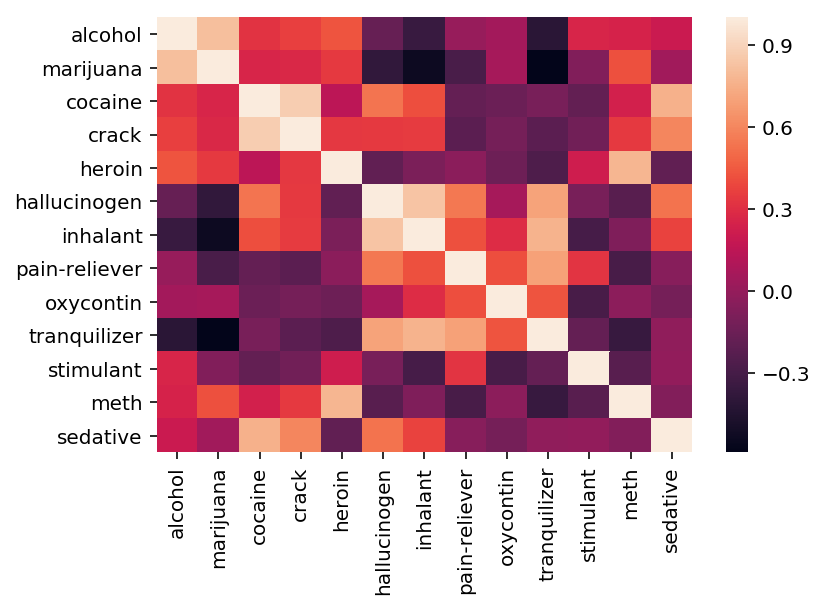

In [77]:
sns.heatmap(drugs_usage_corr)

# Heatmap seems to indicate the following correlation
# Alcohol usage frequency is correlated to marijuana usage frequency
# Cocaine usage frequency is correlated to crack usage frequency
# Hallucinogen usage frequency is correlated to inhalant frequency

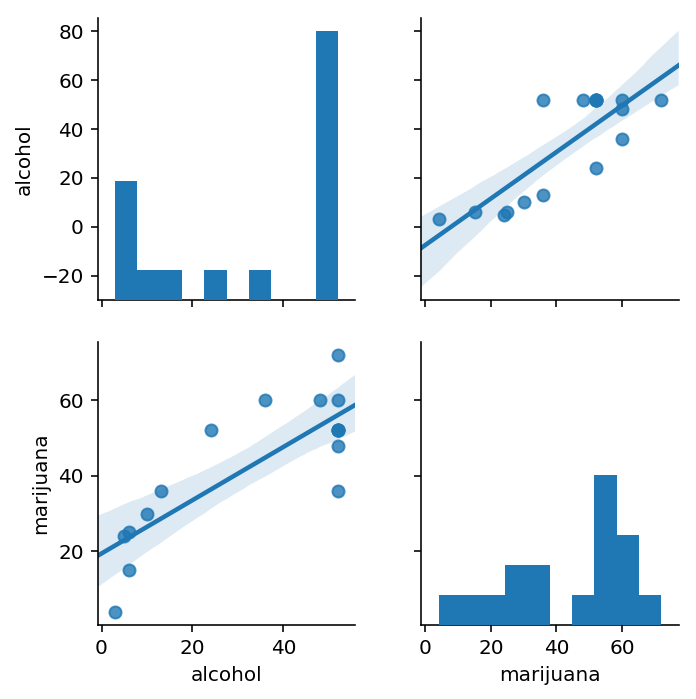

In [78]:
sns.pairplot(drugs_usage[['alcohol','marijuana']], kind='reg')

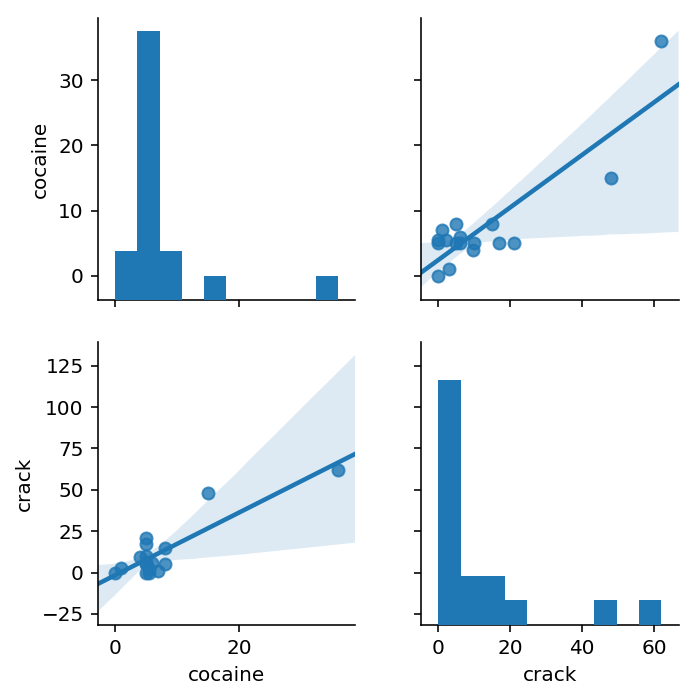

In [79]:
sns.pairplot(drugs_usage[['cocaine','crack']], kind='reg')

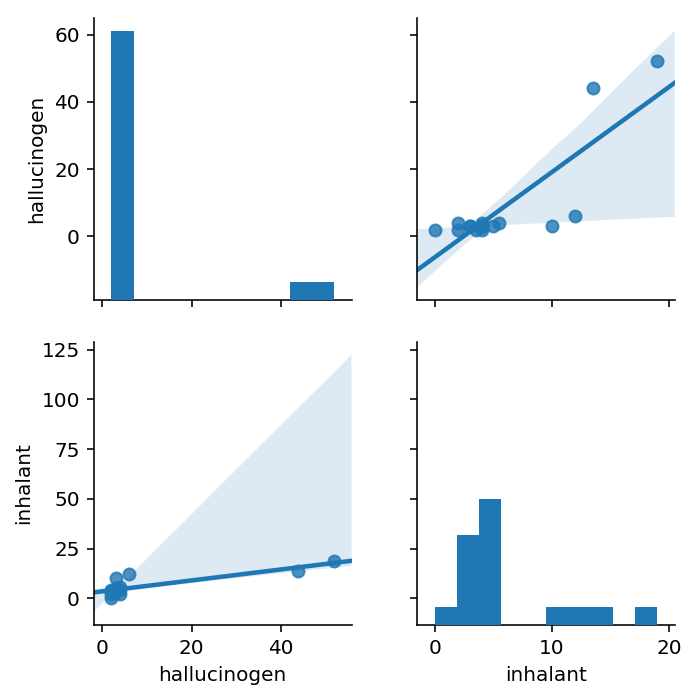

In [80]:
sns.pairplot(drugs_usage[['hallucinogen','inhalant']], kind='reg')

In [ ]:
# The correlation matrix shows a strong correlation between the following pairs of drugs usage:
# 1. Alcohol and marijuana
# 2. Cocaine and crack
# 3. Hallucinogen and inhalant

# but the pairplots shows that outliers might have coincidentally resulted in a strong mathematical 
# correlation

<p style="color:#ff0000;">
Good Job!

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [ ]:
# From above, it is observed that the proportion of drug users between marijuana and oxycontin is highly correlated both
# mathematically and visually on a scatter plot.

# The median usage of cocaine and crack appears to be mathematically correlated, but visually on a scatter plot it might
# be due to outliers.

# use t-test to double check the correlation to see if the two groups of data are from the same population

In [81]:
# Test 1 - Proportion of drug users of Marijuana and Oxycontin
# H_0 : That the drug users of marijuana and of oxycontin are from the same population
# H_1 : That the drug users of the two drugs are not from the same population

sample1 = drugs_users['marijuana-use']
sample2 = drugs_users['oxycontin-use']

stats.ttest_ind(sample1, sample2)

# As the p-value is below 0.05, the null hypothesis can be rejected and the drug users of marijuana are most likely
# not from the same population as users of oxycontin 

Ttest_indResult(statistic=6.159266475995913, pvalue=6.850419452989526e-07)

In [82]:
# Test 2 - Median usage of cocaine and crack
# H_0 : That the usage of cocaine and crack are from the same population
# H_1 : That the usage of cocaine and crack are not from the same population

sample3 = drugs_usage['cocaine']
sample4 = drugs_usage['crack']

stats.ttest_ind(sample3, sample4)

# As the p-value is greater than 0.05, hence the null hypothesis cannot be rejected and the usage of cocaine and crack
# is likely to be similar.

Ttest_indResult(statistic=-1.071766383665013, pvalue=0.2918418718218422)

In [ ]:
# The results of the t-tests are completely opposite to what I was expecting.

# For the samples of marijuana and oxycontin, there appears to be strong correlation, but the t-test indicates
# that the two samples are probably not related.

# For the samples of cocaine and crack, I suspected that the strong correlation might be coincidental, but the
# t-test 

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [83]:
df_sat['Rate'].describe()

count    51.000000
mean     37.000000
std      27.550681
min       4.000000
25%       9.000000
50%      33.000000
75%      64.000000
max      82.000000
Name: Rate, dtype: float64

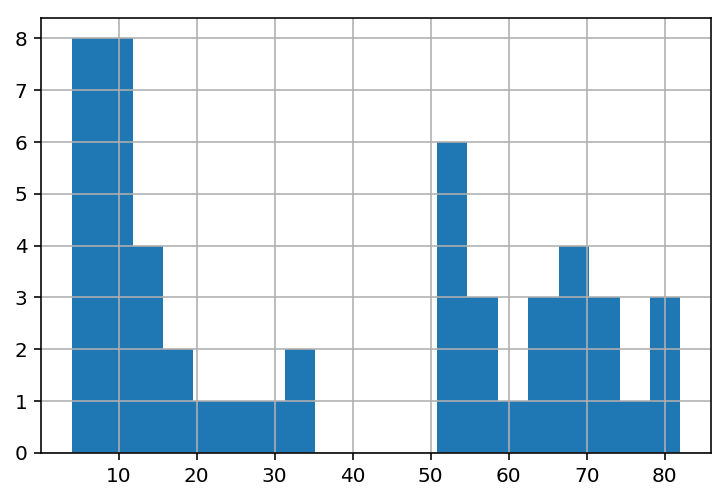

In [84]:
df_sat['Rate'].hist(bins=20)

In [85]:
# Assume definition of outliers lies 1.5 times of interquartile range from the lower and upper quartile

iqr = df_sat['Rate'].quantile(.75) - df_sat['Rate'].quantile(.25)

rate_lower = df_sat['Rate'].quantile(.25) - iqr

# Since there can't be negative rate, if the lower range of rate is negative, set it to zero
if rate_lower < 0:
    rate_lower = 0
    
rate_upper = df_sat['Rate'].quantile(.75) + iqr

rate_outliers = df_sat[(df_sat['Rate']<rate_lower) | (df_sat['Rate']>rate_upper)]
rate_outliers

,State,Rate,Verbal,Math,VerbalMinusMath


In [ ]:
# there are no outliers, however from the histogram plot, it appears that there might be 2 clusters of states
# with 2 distinct distributions of the participation rate

<p style="color:#ff0000;">
Good Job!

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [86]:
# Pearson correlation between Verbal and Math
p_corr = stats.pearsonr(df_sat['Verbal'], df_sat['Math'])

# Spearman correlation between Verbal and Math
s_corr = stats.spearmanr(df_sat['Verbal'], df_sat['Math'])

print('Pearson correlation: {}'.format(p_corr))
print('Spearman correlation: {}'.format(s_corr))

Pearson correlation: (0.8999093181811048, 2.735579353543464e-19)
Spearman correlation: SpearmanrResult(correlation=0.9094125143903472, pvalue=2.6565430361616923e-20)


In [ ]:
# The Spearman and Pearson correlation are both quite similar, though the Spearman is slightly higher.

# To calculate the spearman correlation, one set of variables (eg. Verbal) are sorted in ascending order and assigned a rank.
# The other set of variables (eg. Math) are similarly sorted in ascending order and assigned another rank.
# The sum of differences squared between the two ranks are used into the final computation of the correlation coefficient

<p style="color:#ff0000;">
Good Job!

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [87]:
for index, value in enumerate(df_sat['Rate']):
     df_sat.loc[index, 'Rate_percentile'] = stats.percentileofscore(df_sat['Rate'], value)

print(df_sat[df_sat['State']=='CA'])

   State  Rate  Verbal  Math  VerbalMinusMath  Rate_percentile
23    CA    51     498   517              -19        55.882353


In [ ]:
# Both the percentile scoring and spearman rank correlation orders the data and ranks them relative to other
# data points

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

In [ ]:
# Percentile scoring is useful for dealing with outliers because it removes the variance of each data point from
# the mean and instead ranks the data points relative to each other, hence it is able to include all data points
# instead of excluding outliers

In [88]:
heroin = pd.DataFrame()

for index, value in enumerate(drugs_usage['heroin']):
    heroin.loc[index, 'heroin'] = value
    heroin.loc[index, 'percentile'] = stats.percentileofscore(drugs_usage['heroin'], value)
        
heroin

,heroin,percentile
0,35.5,29.411765
1,0.0,5.882353
2,2.0,17.647059
3,1.0,11.764706
4,66.5,76.470588
5,64.0,64.705882
6,46.0,47.058824
7,180.0,94.117647
8,45.0,41.176471
9,30.0,23.529412


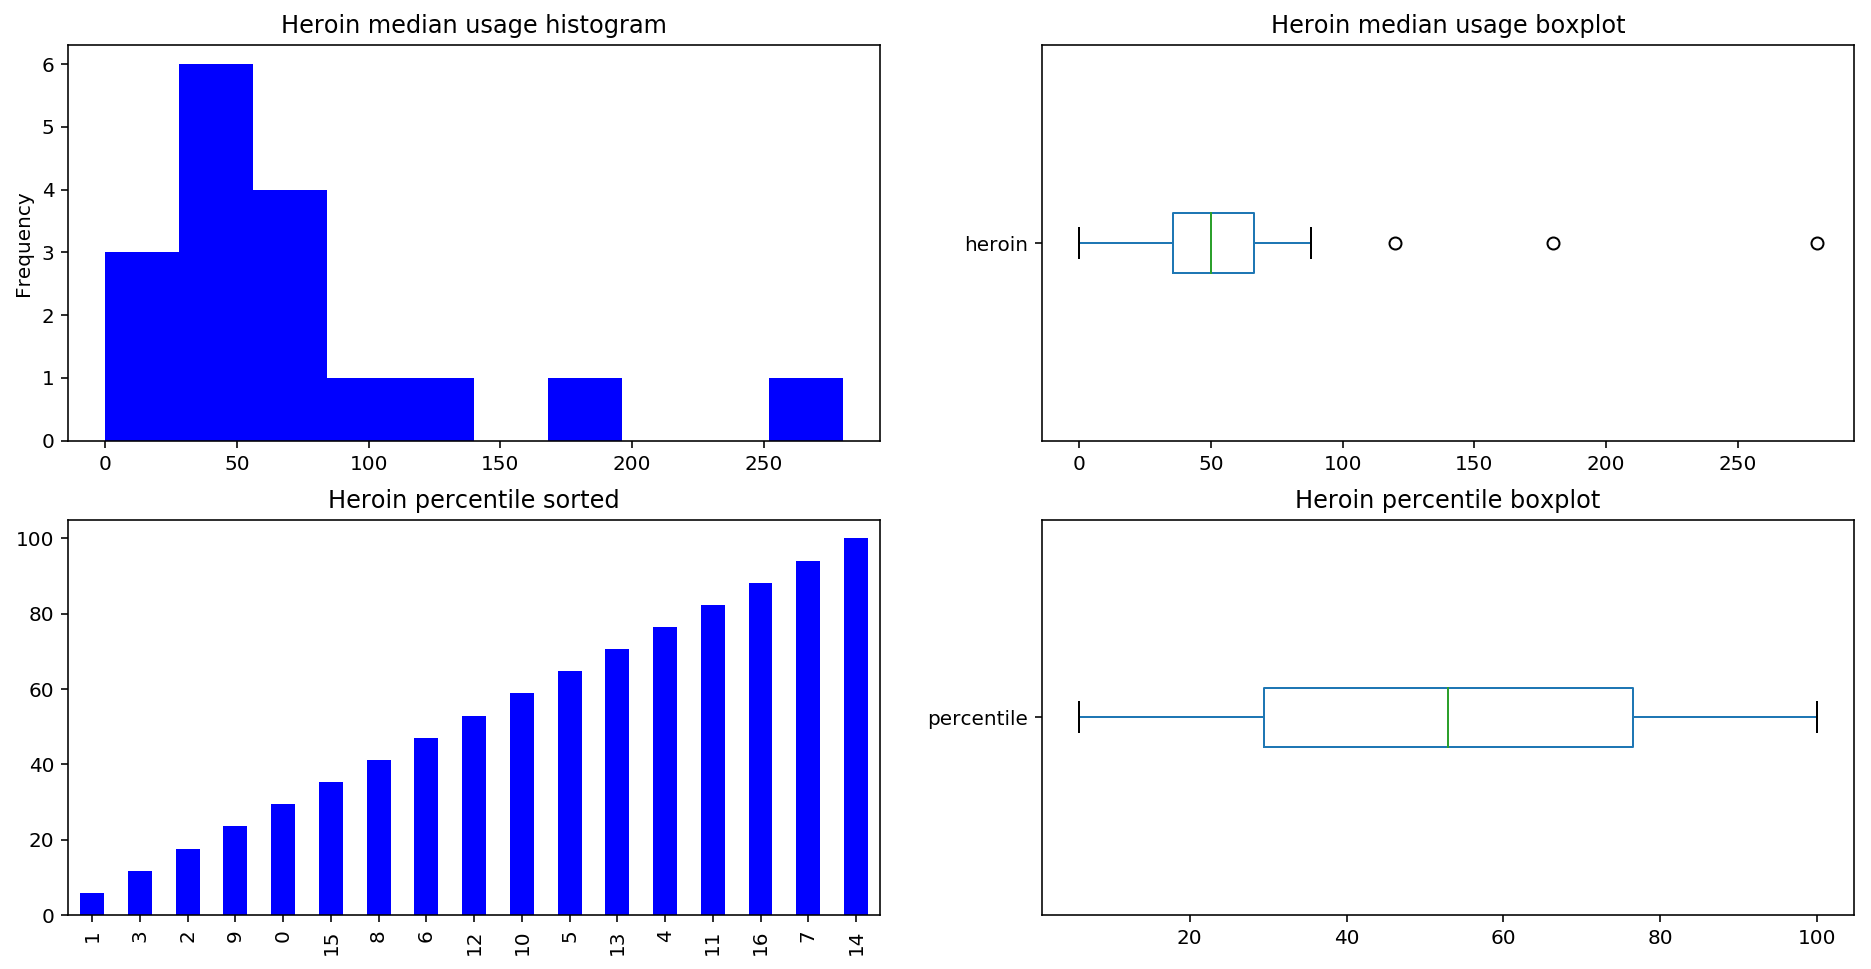

In [89]:
# Select the heroin median usage variable for its irregular distribution

fig, axes = plt.subplots(2,2, figsize=(16,8))
heroin['heroin'].plot(kind='hist', bins=10, color='b', ax=axes[0][0], title='Heroin median usage histogram')
heroin['heroin'].plot(kind='box', ax=axes[0][1], vert=False, title='Heroin median usage boxplot')
heroin['percentile'].sort_values().plot(kind='bar', color='b', ax=axes[1][0], title='Heroin percentile sorted')
heroin['percentile'].plot(kind='box', ax=axes[1][1], vert=False, title='Heroin percentile boxplot')

# sns.boxplot(drugs_usage['heroin'])

In [ ]:
# the effect of percentile scoring is the same as normalising the values over the data range (max-min)

<p style="color:#ff0000;">
Good Job in converting to percentile, however, the question actually wants you to plot its distribution instead of a sorted bar chart. If you plot its distribution, you should observe that it is now more uniform.

<p style="color:#ff0000;">
Overall great work done! However, to improve on future projects you can do some research on the topic and infer possible explanations to the observations. Gambate!